# Classificador de vozes Fuzzy 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Classificador-de-vozes-Fuzzy" data-toc-modified-id="Classificador-de-vozes-Fuzzy-1">Classificador de vozes Fuzzy</a></span><ul class="toc-item"><li><span><a href="#Classificador-Fuzzy" data-toc-modified-id="Classificador-Fuzzy-1.1">Classificador Fuzzy</a></span><ul class="toc-item"><li><span><a href="#Variáveis-de-Entrada" data-toc-modified-id="Variáveis-de-Entrada-1.1.1">Variáveis de Entrada</a></span></li><li><span><a href="#Base-de-Regras" data-toc-modified-id="Base-de-Regras-1.1.2">Base de Regras</a></span></li><li><span><a href="#Inferência-Fuzzy" data-toc-modified-id="Inferência-Fuzzy-1.1.3">Inferência Fuzzy</a></span></li><li><span><a href="#Fluxo-Wang-Mendel" data-toc-modified-id="Fluxo-Wang-Mendel-1.1.4">Fluxo Wang-Mendel</a></span></li></ul></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-1.2">Referencias</a></span></li></ul></li></ul></div>

In [1]:
!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

#importando dados para utilização
my_data = np.genfromtxt('voice.csv', delimiter=',')


## Classificador Fuzzy

### Variáveis de Entrada

In [3]:
resolution = 0.0001 #resoluçao alta devido a baixa variação dos valores

#Como todos os valores estão normalizados criaremos variaveis discretas entre 0 e 1
var1  = np.arange(0, 1+resolution, resolution)
var2  = np.arange(0, 1+resolution, resolution)
var3  = np.arange(0, 1+resolution, resolution)
var4  = np.arange(0, 1+resolution, resolution)
var5  = np.arange(0, 1+resolution, resolution)
label = np.arange(0, 1+resolution, resolution)

In [4]:
#Definindo constantes para os nomes para reutilização em graficos e maps
VAR1_LO = 'VAR1 Baixa'
VAR1_ML = 'VAR1 Média Baixa'
VAR1_M  = 'VAR1 Média'
VAR1_MH = 'VAR1 Média Alta'
VAR1_HI = 'VAR1 Alta'

VAR2_LO = 'VAR2 Baixa'
VAR2_ML = 'VAR2 Média Baixa'
VAR2_M  = 'VAR2 Média'
VAR2_MH = 'VAR2 Média Alta'
VAR2_HI = 'VAR2 Alta'

VAR3_LO = 'VAR3 Baixa'
VAR3_ML = 'VAR3 Média Baixa'
VAR3_M  = 'VAR3 Média'
VAR3_MH = 'VAR3 Média Alta'
VAR3_HI = 'VAR3 Alta'

VAR4_LO = 'VAR4 Baixa'
VAR4_ML = 'VAR4 Média Baixa'
VAR4_M  = 'VAR4 Média'
VAR4_MH = 'VAR4 Média Alta'
VAR4_HI = 'VAR4 Alta'

VAR5_LO = 'VAR5 Baixa'
VAR5_ML = 'VAR5 Média Baixa'
VAR5_M  = 'VAR5 Média'
VAR5_MH = 'VAR5 Média Alta'
VAR5_HI = 'VAR5 Alta'

LABL_M  = 'Voz Masculina'
LABL_F  = 'Voz Feminina'

In [5]:
#Gerando os conjuntos fuzzy uniformemente
var1_lo = fuzz.trimf(var1,[0,0,0.25])
var1_ml = fuzz.trimf(var1,[0,0.25,0.5])
var1_m  = fuzz.trimf(var1,[0.25,0.5,0.75])
var1_mh = fuzz.trimf(var1,[0.5,0.75,1])
var1_hi = fuzz.trimf(var1,[0.75,1,1 ])

var2_lo = fuzz.trimf(var2,[0,0,0.25])
var2_ml = fuzz.trimf(var2,[0,0.25,0.5])
var2_m  = fuzz.trimf(var2,[0.25,0.5,0.75])
var2_mh = fuzz.trimf(var2,[0.5,0.75,1])
var2_hi = fuzz.trimf(var2,[0.75,1,1 ])

var3_lo = fuzz.trimf(var3,[0,0,0.25])
var3_ml = fuzz.trimf(var3,[0,0.25,0.5])
var3_m  = fuzz.trimf(var3,[0.25,0.5,0.75])
var3_mh = fuzz.trimf(var3,[0.5,0.75,1])
var3_hi = fuzz.trimf(var3,[0.75,1,1 ])

var4_lo = fuzz.trimf(var4,[0,0,0.25])
var4_ml = fuzz.trimf(var4,[0,0.25,0.5])
var4_m  = fuzz.trimf(var4,[0.25,0.5,0.75])
var4_mh = fuzz.trimf(var4,[0.5,0.75,1])
var4_hi = fuzz.trimf(var4,[0.75,1,1 ])

var5_lo = fuzz.trimf(var5,[0,0,0.25])
var5_ml = fuzz.trimf(var5,[0,0.25,0.5])
var5_m  = fuzz.trimf(var5,[0.25,0.5,0.75])
var5_mh = fuzz.trimf(var5,[0.5,0.75,1])
var5_hi = fuzz.trimf(var5,[0.75,1,1 ])

labl_m  = fuzz.trapmf(label,[0,0,0.49,0.5])
labl_f  = fuzz.trapmf(label,[0.5,0.51,1,1])


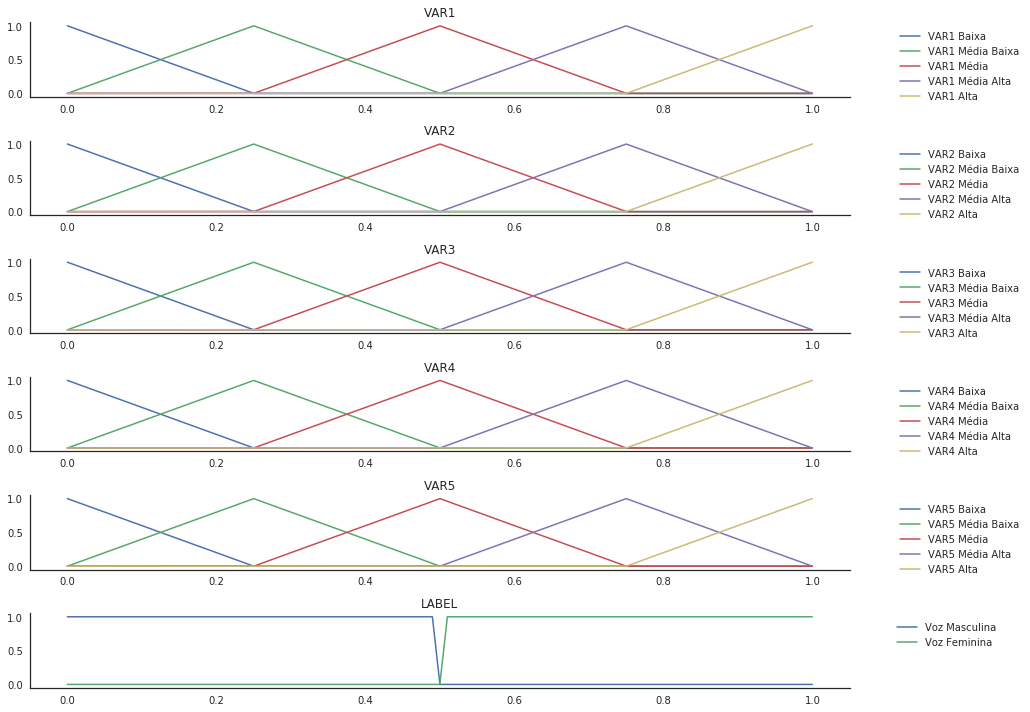

In [6]:
#Visualizando as variáveis criadas
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, figsize=(12, 10))

ax0.plot(var1, var1_lo, 'b', linewidth=1.5, label=VAR1_LO)
ax0.plot(var1, var1_ml, 'g', linewidth=1.5, label=VAR1_ML)
ax0.plot(var1, var1_m , 'r', linewidth=1.5, label=VAR1_M)
ax0.plot(var1, var1_mh, 'm', linewidth=1.5, label=VAR1_MH)
ax0.plot(var1, var1_hi, 'y', linewidth=1.5, label=VAR1_HI)
ax0.set_title('VAR1')
ax0.legend(bbox_to_anchor=(1.05, 1))

ax1.plot(var2, var2_lo, 'b', linewidth=1.5, label=VAR2_LO)
ax1.plot(var2, var2_ml, 'g', linewidth=1.5, label=VAR2_ML)
ax1.plot(var2, var2_m , 'r', linewidth=1.5, label=VAR2_M)
ax1.plot(var2, var2_mh, 'm', linewidth=1.5, label=VAR2_MH)
ax1.plot(var2, var2_hi, 'y', linewidth=1.5, label=VAR2_HI)
ax1.set_title('VAR2')
ax1.legend(bbox_to_anchor=(1.05, 1))

ax2.plot(var3, var3_lo, 'b', linewidth=1.5, label=VAR3_LO)
ax2.plot(var3, var3_ml, 'g', linewidth=1.5, label=VAR3_ML)
ax2.plot(var3, var3_m , 'r', linewidth=1.5, label=VAR3_M)
ax2.plot(var3, var3_mh, 'm', linewidth=1.5, label=VAR3_MH)
ax2.plot(var3, var3_hi, 'y', linewidth=1.5, label=VAR3_HI)
ax2.set_title('VAR3')
ax2.legend(bbox_to_anchor=(1.05, 1))

ax3.plot(var4, var4_lo, 'b', linewidth=1.5, label=VAR4_LO)
ax3.plot(var4, var4_ml, 'g', linewidth=1.5, label=VAR4_ML)
ax3.plot(var4, var4_m , 'r', linewidth=1.5, label=VAR4_M)
ax3.plot(var4, var4_mh, 'm', linewidth=1.5, label=VAR4_MH)
ax3.plot(var4, var4_hi, 'y', linewidth=1.5, label=VAR4_HI)
ax3.set_title('VAR4')
ax3.legend(bbox_to_anchor=(1.05, 1))

ax4.plot(var5, var5_lo, 'b', linewidth=1.5, label=VAR5_LO)
ax4.plot(var5, var5_ml, 'g', linewidth=1.5, label=VAR5_ML)
ax4.plot(var5, var5_m , 'r', linewidth=1.5, label=VAR5_M)
ax4.plot(var5, var5_mh, 'm', linewidth=1.5, label=VAR5_MH)
ax4.plot(var5, var5_hi, 'y', linewidth=1.5, label=VAR5_HI)
ax4.set_title('VAR5')
ax4.legend(bbox_to_anchor=(1.05, 1))

ax5.plot(label, labl_m, 'b', linewidth=1.5, label=LABL_M)
ax5.plot(label, labl_f, 'g', linewidth=1.5, label=LABL_F)
ax5.set_title('LABEL')
ax5.legend(bbox_to_anchor=(1.19, 1))



# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3, ax4, ax5):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()
fig.savefig('fuzzy-sets.png')

### Base de Regras

In [7]:
def generate_rule_base(dataset):
    """
    Método para gerar uma base de regras com base nas entradas
    Para cada entrada:
        1. obter o valor de ativação para cada função de pertinencia
        2. selecionar as maiores ativações de cada variável fuzzy
        3. gerar uma regra com as funcoes ativadas
        4. o valor de ativação dessa regra será o mínimo das ativações(norma-T)
    """
    
    #A base de resgras ficará da seguinte forma {(antecedentes):(consequente, ativaçao)}
    rule_base = {}
    for index, row in dataset.iterrows():
        var1_val = row['var1']
        var2_val = row['var2']
        var3_val = row['var3']
        var4_val = row['var4']
        var5_val = row['var5']
        label_val   = LABL_M if row['label'] == 0 else LABL_F
        
        #Obtendo os valores de ativacao. Guarda em um array o par(funcao,ativacao) e depois pega o de maior valor
        actvs_var1 = []
        actvs_var1.append((VAR1_LO, fuzz.interp_membership(var1, var1_lo, var1_val)))
        actvs_var1.append((VAR1_ML, fuzz.interp_membership(var1, var1_ml, var1_val)))
        actvs_var1.append((VAR1_M , fuzz.interp_membership(var1, var1_m , var1_val)))
        actvs_var1.append((VAR1_MH, fuzz.interp_membership(var1, var1_mh, var1_val)))
        actvs_var1.append((VAR1_HI, fuzz.interp_membership(var1, var1_hi, var1_val)))
        actvs_var1.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var1 = actvs_var1[0]
        
        actvs_var2 = []
        actvs_var2.append((VAR2_LO, fuzz.interp_membership(var2, var2_lo, var2_val)))
        actvs_var2.append((VAR2_ML, fuzz.interp_membership(var2, var2_ml, var2_val)))
        actvs_var2.append((VAR2_M , fuzz.interp_membership(var2, var2_m , var2_val)))
        actvs_var2.append((VAR2_MH, fuzz.interp_membership(var2, var2_mh, var2_val)))
        actvs_var2.append((VAR2_HI, fuzz.interp_membership(var2, var2_hi, var2_val)))
        actvs_var2.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var2 = actvs_var2[0]
        
        actvs_var3 = []
        actvs_var3.append((VAR3_LO, fuzz.interp_membership(var3, var3_lo, var3_val)))
        actvs_var3.append((VAR3_ML, fuzz.interp_membership(var3, var3_ml, var3_val)))
        actvs_var3.append((VAR3_M , fuzz.interp_membership(var3, var3_m , var3_val)))
        actvs_var3.append((VAR3_MH, fuzz.interp_membership(var3, var3_mh, var3_val)))
        actvs_var3.append((VAR3_HI, fuzz.interp_membership(var3, var3_hi, var3_val)))
        actvs_var3.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var3 = actvs_var3[0]
        
        actvs_var4 = []
        actvs_var4.append((VAR4_LO, fuzz.interp_membership(var4, var4_lo, var4_val)))
        actvs_var4.append((VAR4_ML, fuzz.interp_membership(var4, var4_ml, var4_val)))
        actvs_var4.append((VAR4_M , fuzz.interp_membership(var4, var4_m , var4_val)))
        actvs_var4.append((VAR4_MH, fuzz.interp_membership(var4, var4_mh, var4_val)))
        actvs_var4.append((VAR4_HI, fuzz.interp_membership(var4, var4_hi, var4_val)))
        actvs_var4.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var4 = actvs_var4[0]
        
        actvs_var5 = []
        actvs_var5.append((VAR5_LO, fuzz.interp_membership(var5, var5_lo, var5_val)))
        actvs_var5.append((VAR5_ML, fuzz.interp_membership(var5, var5_ml, var5_val)))
        actvs_var5.append((VAR5_M , fuzz.interp_membership(var5, var5_m , var5_val)))
        actvs_var5.append((VAR5_MH, fuzz.interp_membership(var5, var5_mh, var5_val)))
        actvs_var5.append((VAR5_HI, fuzz.interp_membership(var5, var5_hi, var5_val)))
        actvs_var5.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var5 = actvs_var5[0]
        
                
        
        #norma-T(min) para obter a ativaçao da regra
        '''activation_rule = min(
            activation_var1[1],
            activation_var2[1],
            activation_var3[1],
            activation_var4[1],
            activation_var5[1]
        )'''
        activation_rule = activation_var1[1]*activation_var2[1]*activation_var3[1]*activation_var4[1]*activation_var5[1]
        
        #Criando os valores para inserir na base de regras
        rule_key = (
            activation_var1[0],
            activation_var2[0],
            activation_var3[0],
            activation_var4[0],
            activation_var5[0]
            )
        rule_value = (label_val, activation_rule)
        
        #Inserindo na base de regras
        if rule_key in rule_base:
            #Mantém o de maior valor
            if rule_value[1] > rule_base[rule_key][1]:
                rule_base[rule_key] = rule_value
        else:
            rule_base[rule_key] = rule_value
            
    return rule_base

### Inferência Fuzzy

In [8]:
def fuzzify(data, rule_base):
    '''
    Recebe uma row do panda.Dataframe como parâmetro e a base de regras gerada
    '''
    var1_val  = data['var1']
    var2_val  = data['var2']
    var3_val  = data['var3']
    var4_val  = data['var4']
    var5_val  = data['var5']
    label_val = LABL_M if data['label'] == 0 else LABL_F
    
    #Realiza o cálculo das ativações guardando no formato {antecedente:ativacao}
    activations = {}
    
    activations[VAR1_LO] = fuzz.interp_membership(var1, var1_lo, var1_val)
    activations[VAR1_ML] = fuzz.interp_membership(var1, var1_ml, var1_val)
    activations[VAR1_M]  = fuzz.interp_membership(var1, var1_m , var1_val)
    activations[VAR1_MH] = fuzz.interp_membership(var1, var1_mh, var1_val)
    activations[VAR1_HI] = fuzz.interp_membership(var1, var1_hi, var1_val)
    
    activations[VAR2_LO] = fuzz.interp_membership(var2, var2_lo, var2_val)
    activations[VAR2_ML] = fuzz.interp_membership(var2, var2_ml, var2_val)
    activations[VAR2_M]  = fuzz.interp_membership(var2, var2_m , var2_val)
    activations[VAR2_MH] = fuzz.interp_membership(var2, var2_mh, var2_val)
    activations[VAR2_HI] = fuzz.interp_membership(var2, var2_hi, var2_val)
    
    activations[VAR3_LO] = fuzz.interp_membership(var3, var3_lo, var3_val)
    activations[VAR3_ML] = fuzz.interp_membership(var3, var3_ml, var3_val)
    activations[VAR3_M]  = fuzz.interp_membership(var3, var3_m , var3_val)
    activations[VAR3_MH] = fuzz.interp_membership(var3, var3_mh, var3_val)
    activations[VAR3_HI] = fuzz.interp_membership(var3, var3_hi, var3_val)
    
    activations[VAR4_LO] = fuzz.interp_membership(var4, var4_lo, var4_val)
    activations[VAR4_ML] = fuzz.interp_membership(var4, var4_ml, var4_val)
    activations[VAR4_M]  = fuzz.interp_membership(var4, var4_m , var4_val)
    activations[VAR4_MH] = fuzz.interp_membership(var4, var4_mh, var4_val)
    activations[VAR4_HI] = fuzz.interp_membership(var4, var4_hi, var4_val)
    
    activations[VAR5_LO] = fuzz.interp_membership(var5, var5_lo, var5_val)
    activations[VAR5_ML] = fuzz.interp_membership(var5, var5_ml, var5_val)
    activations[VAR5_M]  = fuzz.interp_membership(var5, var5_m , var5_val)
    activations[VAR5_MH] = fuzz.interp_membership(var5, var5_mh, var5_val)
    activations[VAR5_HI] = fuzz.interp_membership(var5, var5_hi, var5_val)
    
    #Realizar as inferencias na base de regras e guarda numa lista as regras ativadas
    rules_activated = []
    for antecendentes,consequente in rule_base.items():
        var1_name, var2_name, var3_name, var4_name, var5_name = antecendentes
        value = labl_m if consequente[0] == LABL_M else labl_f
        if(activations[var1_name] != 0 
           and activations[var2_name] != 0 
           and activations[var3_name] != 0 
           and activations[var4_name] != 0
           and activations[var5_name] != 0):
        
            rule_activation = min(activations[var1_name],activations[var2_name],activations[var3_name],activations[var4_name],activations[var5_name])
            rule_activated = np.fmin(rule_activation, value) #faz clipping do conjunto de saida
            rules_activated.append(rule_activated)
        
    #Combinando todas as saidas encontradas
    aggregated = 0
    for rule in rules_activated:
        aggregated = np.fmax(aggregated,rule)
    
    return aggregated
    

In [9]:
def defuzzify(fuzzy_aggregated, method = 'centroid'):
    return fuzz.defuzz(label, fuzzy_aggregated, method)

### Fluxo Wang-Mendel

![flow](img/flow.png)

In [10]:
%%time
from sklearn import preprocessing
from sklearn.decomposition import PCA

voice = pd.read_csv("voice.csv") #carregando o dataset

#importando dados para vizualização
voice = pd.read_csv("voice.csv")

#Normalizando o dataset
min_max_scaler = preprocessing.MinMaxScaler()
voice_scaled = min_max_scaler.fit_transform(voice)
voice = pd.DataFrame(voice_scaled,columns=voice.columns)

#Criando novo dataset com as features
data = voice.values[:,:20] #removendo a coluna das classes
pca = PCA(n_components=5)

# Realiza o PCA e cria os eigen
pca.fit(data) 

# Transforma os dados utilizando os vetores
pca_data = pca.transform(data) 

#Insere os dados normalizados
voice_pca = pd.DataFrame(min_max_scaler.fit_transform(pca_data), columns=['var1','var2','var3','var4','var5']) 

#Adiciona os labels
voice_pca['label'] = voice['label'] 
voice_pca.head()

CPU times: user 169 ms, sys: 19.8 ms, total: 189 ms
Wall time: 290 ms


In [11]:
%%time
train, test = train_test_split(voice_pca, test_size=0.2)

CPU times: user 12.6 ms, sys: 4.44 ms, total: 17 ms
Wall time: 2.79 ms


In [12]:
%%time
rule_base = generate_rule_base(train)
#Visualizando regras
rules = []
for k,v in rule_base.items():
    r=list(k)
    r.append(v[0])
    rules.append(r)
rules_df = pd.DataFrame(rules,columns=['var1', 'var2', 'var3', 'var4', 'var5', 'label'])
rules_df.sort_values(['var1','var2','var3','var4','var5'])

CPU times: user 1.28 s, sys: 65.1 ms, total: 1.34 s
Wall time: 456 ms


In [13]:
%%time
result = []
errors = 0
for index, data in train.iterrows():
    fuzzy_aggregated = fuzzify(data, rule_base)
    label_found = 1 if defuzzify(fuzzy_aggregated,'centroid') > 0.5 else 0
    result.append([label_found,int(data['label'])])
    if(int(label_found != data['label'])):
        errors += 1
result_df = pd.DataFrame(result,columns=['encontrado','real'])
result_df

CPU times: user 28.3 s, sys: 8.48 ms, total: 28.3 s
Wall time: 28.3 s


In [15]:
print("ERROS: {} | PRECISAO: {}%".format(errors, 100 - errors*100/result_df['encontrado'].count()))

ERROS: 273 | PRECISAO: 89.22651933701657%


In [16]:
%%time
result = []
errors = 0
for index, data in test.iterrows():
    fuzzy_aggregated = fuzzify(data, rule_base)
    label_found = 1 if defuzzify(fuzzy_aggregated,'centroid') > 0.5 else 0
    result.append([label_found,int(data['label'])])
    if(int(label_found != data['label'])):
        errors += 1
result_df = pd.DataFrame(result,columns=['encontrado','real'])
result_df

CPU times: user 6.98 s, sys: 3.78 ms, total: 6.98 s
Wall time: 7 s


In [17]:
print("ERROS: {} | PRECISAO: {}%".format(errors, 100 - errors*100/result_df['encontrado'].count()))

ERROS: 84 | PRECISAO: 86.75078864353313%


## Referencias
Dataset: https://www.kaggle.com/primaryobjects/voicegender/data  
Data visualization: https://www.kaggle.com/zhiboyang/data-visualization  
Trabalho semelhante: https://github.com/johntheo/MESTRADO/blob/master/notebooks/inteligencia_artificial/Trabalho-Fuzzy.ipynb 